## Setup

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

#The data are shuffled before performing cross-validation.
#Setting random seed ensures that we always get the same results on test data, if we re-run the notebook.
np.random.seed(seed=33)

## Part 1 - linearly separable data

Error rate on test data: 0.0
Avg. rate of negative examples (from test data) being classified as positive: 0.0
Avg. rate of positive examples (from test data) being classified as negative: 0.0

Error rate on train data: 0.0
Avg. rate of negative examples (from train data) being classified as positive: 0.0
Avg. rate of positive examples (from train data) being classified as negative: 0.0


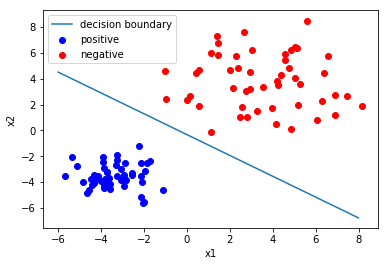

In [33]:
X=np.loadtxt("data/linsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/linsep-trainclass.csv", delimiter=',')

logreg = linear_model.LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True)
conf_matrix_test=np.zeros((2,2))
conf_matrix_train=np.zeros((2,2))

for train_index, test_index in skf.split(X, y):   
    X_train= X[train_index]
    X_test= X[test_index]
    y_train= y[train_index]
    y_test= y[test_index]
    
    logreg.fit(X_train, y_train)
    pred_test=logreg.predict(X_test) 
    pred_train=logreg.predict(X_train) 
    conf_matrix_test+=confusion_matrix(y_test,pred_test)
    conf_matrix_train+=confusion_matrix(y_train,pred_train)
    
error_test=(conf_matrix_test[0,1]+conf_matrix_test[1,0])/np.sum(conf_matrix_test)
error_train=(conf_matrix_train[0,1]+conf_matrix_train[1,0])/np.sum(conf_matrix_train)

print("Error rate on test data:",error_test)
print("Avg. rate of negative examples (from test data) being classified as positive:",(conf_matrix_test[0,1])/(conf_matrix_test[0,0]+conf_matrix_test[0,1]))
print("Avg. rate of positive examples (from test data) being classified as negative:",(conf_matrix_test[1,0])/(conf_matrix_test[1,1]+conf_matrix_test[1,0]))

print()
print("Error rate on train data:",error_train)
print("Avg. rate of negative examples (from train data) being classified as positive:",(conf_matrix_train[0,1])/(conf_matrix_train[0,0]+conf_matrix_train[0,1]))
print("Avg. rate of positive examples (from train data) being classified as negative:",(conf_matrix_train[1,0])/(conf_matrix_train[1,1]+conf_matrix_train[1,0]))

logreg.fit(X, y)

decision_boundary_x=np.asarray([-6,8])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

positive_scatter=plt.scatter(X[y==1,0], X[y==1,1], c='b', label="positive")
negative_scatter=plt.scatter(X[y==-1,0], X[y==-1,1], c='r', label="negative")
plt.plot(decision_boundary_x, decision_boundary_y, label="decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Part 2 - nonseparable data

Error rate on test data: 0.04
Avg. rate of negative examples (from test data) being classified as positive: 0.02
Avg. rate of positive examples (from test data) being classified as negative: 0.06

Error rate on train data: 0.0267
Avg. rate of negative examples (from train data) being classified as positive: 0.022222222222222223
Avg. rate of positive examples (from train data) being classified as negative: 0.03111111111111111


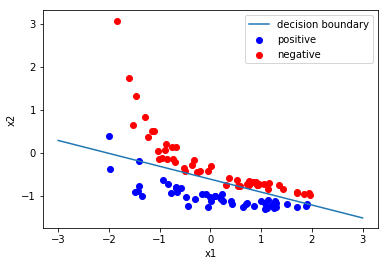

In [34]:
X=np.loadtxt("data/nonlinsep-traindata.csv", delimiter=',')
y=np.loadtxt("data/nonlinsep-trainclass.csv", delimiter=',')


logreg = linear_model.LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True)
conf_matrix_test=np.zeros((2,2))
conf_matrix_train=np.zeros((2,2))

for train_index, test_index in skf.split(X, y):   
    X_train= X[train_index]
    X_test= X[test_index]
    y_train= y[train_index]
    y_test= y[test_index]
    
    logreg.fit(X_train, y_train)
    pred_test=logreg.predict(X_test) 
    pred_train=logreg.predict(X_train) 
    conf_matrix_test+=confusion_matrix(y_test,pred_test)
    conf_matrix_train+=confusion_matrix(y_train,pred_train)
    
error_test=(conf_matrix_test[0,1]+conf_matrix_test[1,0])/np.sum(conf_matrix_test)
error_train=(conf_matrix_train[0,1]+conf_matrix_train[1,0])/np.sum(conf_matrix_train)

print("Error rate on test data:",error_test)
print("Avg. rate of negative examples (from test data) being classified as positive:",(conf_matrix_test[0,1])/(conf_matrix_test[0,0]+conf_matrix_test[0,1]))
print("Avg. rate of positive examples (from test data) being classified as negative:",(conf_matrix_test[1,0])/(conf_matrix_test[1,1]+conf_matrix_test[1,0]))

print()
print("Error rate on train data:",error_train)
print("Avg. rate of negative examples (from train data) being classified as positive:",(conf_matrix_train[0,1])/(conf_matrix_train[0,0]+conf_matrix_train[0,1]))
print("Avg. rate of positive examples (from train data) being classified as negative:",(conf_matrix_train[1,0])/(conf_matrix_train[1,1]+conf_matrix_train[1,0]))

logreg.fit(X, y)

decision_boundary_x=np.asarray([-3,3])
decision_boundary_y=(-logreg.intercept_-logreg.coef_[0,0]*decision_boundary_x)/logreg.coef_[0,1]

positive_scatter=plt.scatter(X[y==1,0], X[y==1,1], c='b', label="positive")
negative_scatter=plt.scatter(X[y==-1,0], X[y==-1,1], c='r', label="negative")
plt.plot(decision_boundary_x, decision_boundary_y, label="decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## Discussion
Both datasets are 'easy' in a sense that they are low-dimensional, first dataset is linearly separable, and linear classifiers are able to achieve high accuracy  on both datasets.
Although we can use the Perceptron classifier, I propose to use logistic regression instead, for 2 main reasons: <br>
   1) On linearly separable data, Perceptron has no way how to choose the best one between all possible decision boundaries which can separate the data. Thus, the logistic regression should be more robust, and perform better on unseen data.<br>
   2) The output of logistic regression can be interpreted as a probability that the sample belongs to given class. <br>
   
The test error rates are 0.0 on first dataset and 0.04 on second dataset. The logistic regression should be sufficient for most applications, and I would probably recommend to use it in production. However, the final answer to the question which classification method to use depends on the specific task: What are the losses associated with misclassification? (Is the application supposed to control a nuclear plant, or recommend a product on e-shop?) Are the losses for misclassification symmetric? On the second dataset, logistic regression classified 3 positive examples as negative, while only 1 negative example was classified as positive. Is misclassification of one class more costly than of the other? Do we have any use for the predicted probability, or are we interested just in classification? Can we obtain more data?<br>
If the classification task is somewhat critical, it would be reasonable to try different classification methods and consider using ensemble of these with best performance on data.
